In [1]:
import json
import pandas as pd
import numpy as np

In [2]:
with open("processed_decomposed_dataset.jsonl", "r") as f:
    data_txt = [json.loads(x) for x in f.readlines()]

In [3]:
data_txt[4]

{'query': 'I have a project where we deploy the "Vertex AI Vision SDK" into a container in Docker Desktop on the client computer on the edge and the sdk pushes the camera feed from the rtsp to Google Cloud\'s Vertex AI Vision and it goes through pre-trained human/vehicle model to find out count and that information is written into BigQuery in json format. This information will be queried and provided back to the customer in json response. \n\nI would like to identify the roundtrip time from the start of the stream to the json response. However the timestamp on the camera is off. It\'s hard to evaluate the roundtrip time. \n\nProvide me methodologies/ideas on how to accurately calculate the roundtrip time.',
 'output_a': 'To accurately calculate the roundtrip time for your Vertex AI Vision SDK container deployment, you can use the following methodologies:\n\n1. Add a timestamp to the camera feed: You can add a timestamp to the camera feed that is sent to Vertex AI Vision. This will allo

In [4]:
data_df = pd.DataFrame(data_txt)

In [5]:
data_df

,query,output_a,M_a_text,T_a_text,A_a_text,M_a_span,T_a_span,A_a_span,S_a,output_b,M_b_text,T_b_text,A_b_text,M_b_span,T_b_span,A_b_span,S_b,label
0,Define Signal Discuss its various properties w...,A signal is a form of energy that is used to t...,"Begins by interpreting the user's request, pro...",Transitions into a structured breakdown of sig...,A signal is a form of energy that is used to t...,"[0, 27]","[28, 102]","[0, 121]",Define and List Core Properties,A signal is a message that is conveyed from a ...,"Opens by interpreting the user's intent, defin...",Implements a systematic approach by listing an...,A signal is a message that is conveyed from a ...,"[0, 38]","[39, 180]","[0, 205]",Comprehensive List with Examples and Diagram R...,1
1,Please make a list of independent Fertility co...,"Sure, here are some independent Fertility coac...",Signals intent to fulfill the user's request a...,Implements the plan by presenting a numbered l...,1. Fertility Authority\n2. Fertility Solutions...,"[0, 18]","[19, 70]","[19, 70]",List Format with Placeholder Filling,"Sure, here is a list of independent Fertility ...",Acknowledges the request and frames the respon...,Executes by providing a numbered list of plaus...,1. Fertility Focus LLC\n2. Fertility Journey I...,"[0, 20]","[21, 99]","[21, 99]",List with Caveat and User Guidance,3
2,Explain various data mining functionalities wi...,Data mining is a process of discovering patter...,"Begins by interpreting the user's request, def...","Transitions into a structured list, systematic...",These are just a few examples of the many diff...,"[0, 27]","[28, 169]","[170, 239]","Define, List, and Exemplify",Data mining is the process of discovering patt...,Opens with a concise definition of data mining...,"Implements a detailed, itemized approach: for ...",These are just a few examples of the many data...,"[0, 20]","[21, 210]","[211, 282]","Define, Enumerate, and Contextualize",1
3,How do I change the short cut on mac osx to to...,To change the shortcut on Mac OS X to toggle t...,"Sets up a clear instructional intent, restatin...","Implements a detailed, sequential procedure wi...",That's it! Now you can use the key combination...,"[0, 18]","[19, 143]","[144, 159]",Stepwise Procedural Guide,To change the shortcut for toggling VoiceOver ...,Restates the user's goal and frames the respon...,"Presents a concise, ordered list of steps, inc...",Note: The default shortcut to toggle VoiceOver...,"[0, 16]","[17, 120]","[121, 135]",Concise Step List with Default Reference,0
4,"I have a project where we deploy the ""Vertex A...",To accurately calculate the roundtrip time for...,Restates the user's goal and frames the respon...,Organizes the answer as a numbered list of dis...,"By using one or more of these methodologies, y...","[0, 19]","[20, 120]","[121, 143]",List of Methods with Summary Conclusion,Here are some methodologies and ideas to accur...,Introduces the response as a direct answer to ...,"Presents a detailed, numbered list of methodol...","By implementing these methodologies, you can a...","[0, 18]","[19, 188]","[189, 211]",Comprehensive Tool-Based Method List,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9114,I want to open the developler tools in chrome ...,I'm here to help! It's possible that the websi...,Expresses intent to help and frames the proble...,Suggests a step-by-step approach to confirm th...,If you need to use the developer tools on this...,"[0, 33]","[34, 107]","[108, 146]",Diagnose and Advise with Alternatives,The shortcut for opening the developer tools i...,Begins by clarifying the standard shortcuts an...,"Lists multiple possible reasons for the issue,...","If none of these solutions work, you can try u...","[0, 32]","[33, 181]","[182, 232]",Enumerate Causes and Troubleshoot,1
9115,Market trends in the 13th century in france\n<...,The economic and agricultural growth in 13th c...,Begins by framing the historical context and c...,"Considers po

In [6]:
data_df['label'].value_counts()

label
 0    2007
 1    1686
-1    1345
 2    1328
-2    1233
 3     769
-3     751
Name: count, dtype: int64

In [7]:
def MTA_span_analysis(row):
    out_a = row['output_a']
    len_a = len(out_a.split(" "))
    out_b = row['output_b']
    len_b = len(out_b.split(" "))

    M_a_start, M_a_end = row['M_a_span'] if len(row['M_a_span']) == 2 else (0, 0)
    T_a_start, T_a_end = row['T_a_span'] if len(row['T_a_span']) == 2 else (0, 0)
    A_a_start, A_a_end = row['A_a_span'] if len(row['A_a_span']) == 2 else (0, 0)

    M_b_start, M_b_end = row['M_b_span'] if len(row['M_b_span']) == 2 else (0, 0)
    T_b_start, T_b_end = row['T_b_span'] if len(row['T_b_span']) == 2 else (0, 0)
    A_b_start, A_b_end = row['A_b_span'] if len(row['A_b_span']) == 2 else (0, 0)

    row['len_a'] = len_a
    row['len_b'] = len_b

    row['start_M_a'] = M_a_start / len_a
    row['end_M_a'] = M_a_end / len_a

    row['start_T_a'] = T_a_start / len_a
    row['end_T_a'] = T_a_end / len_a

    row['start_A_a'] = A_a_start / len_a
    row['end_A_a'] = A_a_end / len_a

    row['start_M_b'] = M_b_start / len_b
    row['end_M_b'] = M_b_end / len_b

    row['start_T_b'] = T_b_start / len_b
    row['end_T_b'] = T_b_end / len_b

    row['start_A_b'] = A_b_start / len_b
    row['end_A_b'] = A_b_end / len_b
    return row


In [8]:
new_df = data_df.apply(MTA_span_analysis, axis=1)

In [9]:
new_df["len_a"].mean(), new_df["len_b"].mean()

(228.88112731659174, 249.31922359907884)

In [10]:
new_df['start_A_a'].mean(), new_df['end_A_a'].mean(), new_df['start_A_b'].mean(), new_df['end_A_b'].mean()

(0.4307368504152278,
 1.3082202833196537,
 0.45925024884786353,
 1.1208677887501024)

In [11]:
new_df['start_M_a'].mean(), new_df['end_M_a'].mean(), new_df['start_M_b'].mean(), new_df['end_M_b'].mean()

(0.0008669570099153305,
 0.1302537237003171,
 0.0009955354937316802,
 0.1422490106064255)

In [12]:
new_df['start_T_a'].mean(), new_df['end_T_a'].mean(), new_df['start_T_b'].mean(), new_df['end_T_b'].mean()

(0.12077780836506036,
 0.6252283212456938,
 0.12851892285585936,
 0.6397229096659025)

In [13]:
S = pd.Series(list(new_df['S_a']) + list(new_df['S_b']))
M = pd.Series(list(new_df['M_a_text']) + list(new_df['M_b_text']))
T = pd.Series(list(new_df['T_a_text']) + list(new_df['T_b_text']))

In [14]:
S.value_counts()

Enumerate and Explain                       76
Enumerate and Summarize                     68
Stepwise Instructional Guide                61
Enumerate and Advise                        57
Request Clarification                       54
                                            ..
Stepwise Calculation with Labels             1
Direct JSON Listing                          1
Table with Data Validation                   1
Tabular Comparative Analysis                 1
Detailed Breakdown and Purpose Statement     1
Name: count, Length: 15597, dtype: int64

In [15]:
M.value_counts()

Not explicitly present                                                                                                                                                               455
Expresses uncertainty about the user's intent and requests clarification before proceeding.                                                                                            4
Restates the context and signals a summary of the result, showing the model is referencing prior calculation and preparing to deliver the answer.                                      2
Begins by directly defining the term, showing intent to provide a clear, concise explanation tailored to the user's question.                                                          2
Begins by explicitly restating the user's request, signaling understanding and intent to fulfill it.                                                                                   2
                                                                           

In [16]:
T.value_counts()

Not explicitly present                                                                                                                                                                                                                        281
Offers assistance by explicitly asking if the user needs help, inviting further interaction.                                                                                                                                                    3
Asks a clarifying question to gather more information before proceeding.                                                                                                                                                                        2
Transitions from the framing to the execution by presenting the list of patient IDs that fit the specified age range, using a direct enumeration format.                                                                                        2
Implements the plan by formattin

In [17]:
M = M[M!="Not explicitly present"]
T = T[T!="Not explicitly present"]

In [18]:
M.isna().sum(), T.isna().sum()

(0, 0)

In [19]:
prompts = {
    "M": M,
    "T": T,
    "S": S
}

In [20]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-mpnet-base-v2')  # strong general-purpose model

embeddings = {k: model.encode(list(v), normalize_embeddings=True) for k, v in prompts.items()}

c:\Users\kachr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


c:\Users\kachr\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [21]:
import hdbscan
# clustererM = hdbscan.HDBSCAN(min_cluster_size=3, cluster_selection_method='eom', prediction_data=True)
# clustererT = hdbscan.HDBSCAN(min_cluster_size=3, cluster_selection_method='eom', prediction_data=True)
# clustererS = hdbscan.HDBSCAN(min_cluster_size=3, cluster_selection_method='eom', prediction_data=True)
# labels_m = clustererM.fit_predict(embeddings_M)
# labels_t = clustererT.fit_predict(embeddings_T)
# labels_s = clustererS.fit_predict(embeddings_S)

clusterer = {
    "M": hdbscan.HDBSCAN(min_cluster_size=3, cluster_selection_method='eom', prediction_data=True),
    "T": hdbscan.HDBSCAN(min_cluster_size=3, cluster_selection_method='eom', prediction_data=True),
    "S": hdbscan.HDBSCAN(min_cluster_size=3, cluster_selection_method='eom', prediction_data=True)
}

labels = { k: clusterer[k].fit_predict(embeddings[k]) for k in embeddings.keys() }


c:\Users\kachr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\kachr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\kachr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\kachr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\kachr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\d

In [22]:
import numpy as np
import nltk
from collections import Counter
from scipy.stats import entropy
import string

In [23]:
# Compute entropy at each position
def token_entropy(tokens_at_pos):
    counts = Counter(tokens_at_pos)
    probs = np.array([count / len(tokens_at_pos) for count in counts.values()])
    return entropy(probs, base=2)

In [24]:
IGNORE_TOKENS = {"and", "the", "<pad>"} | set(string.punctuation)

In [25]:
def entropy_based_template_generator(cluster, thresh=0.5):
    # Tokenize and lowercase
    tokenized = [nltk.word_tokenize(sent.lower()) for sent in cluster]

    # Pad sentences to same length
    max_len = max(len(tokens) for tokens in tokenized)
    padded = [tokens + ['<pad>'] * (max_len - len(tokens)) for tokens in tokenized]

    # Transpose to group tokens by position
    by_position = list(zip(*padded))

    # Calculate entropy at each token position
    entropies = [token_entropy(pos) for pos in by_position]
    threshold = max(entropies) * thresh

    # Generate template
    template = []
    for pos_tokens, ent in zip(by_position, entropies):
        if ent < threshold:
            most_common = Counter(pos_tokens).most_common(1)[0][0]
            if most_common not in IGNORE_TOKENS:
                template.append(most_common)
        else:
            template.append("...")

    # Post-process to clean up spacing
    final_template = ' '.join(template).replace(" ,", ",").replace(" .", ".").replace(" !", "!").replace(" ?", "?")
    return final_template, entropies


--- Cluster M -1 ---
Sample-1: Begins by interpreting the user's request, providing a general definition of 'signal' and establishing the context for further explanation.
Sample-2: Signals intent to fulfill the user's request and frames the response as a list, indicating understanding of the instruction.
Sample-3: Begins by interpreting the user's request, defining data mining, and setting a context for the explanation.
Template: begins................................................

--- Cluster M 189 ---
Sample-1: Sets up a clear instructional intent, restating the user's goal and signaling a step-by-step approach.
Sample-2: Sets up a step-by-step instructional approach, indicating the response will guide the user through the process.
Sample-3: Sets up a clear instructional intent by directly addressing the user's goal and framing the response as a step-by-step guide.
Template: sets up a clear instructional intent by a...........................

--- Cluster M 50 ---
Sample-1: The m

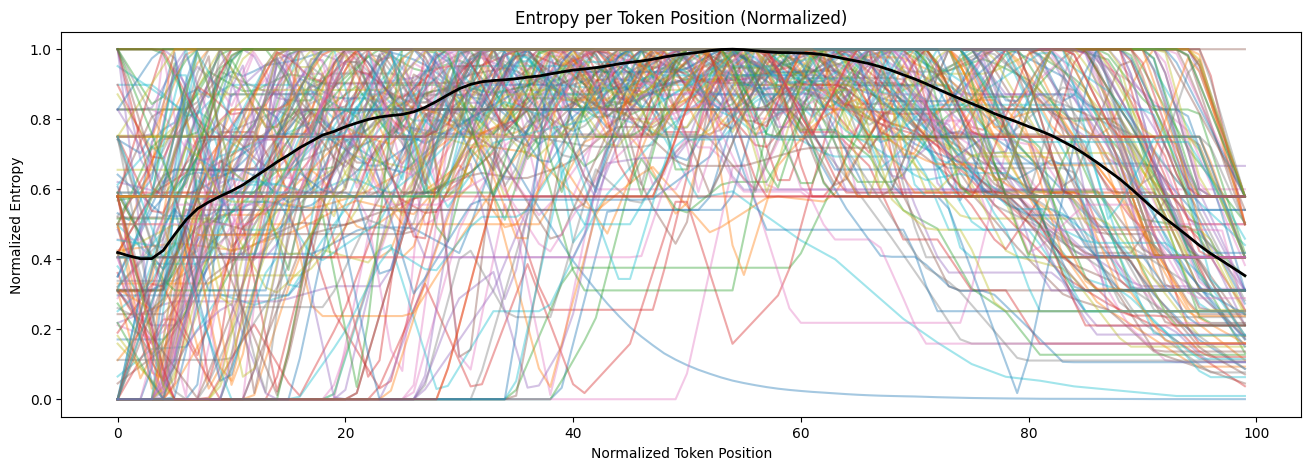


--- Cluster T 2 ---
Sample-1: Transitions into a structured breakdown of signal properties, listing and defining amplitude, frequency, and phase, and then explains how a diagram (waveform) can represent these properties.
Sample-2: Implements the plan by presenting a numbered list format, but after a few unique entries, repeats a generic placeholder name to fill out the list.
Sample-3: Transitions into a structured list, systematically naming and describing each functionality, and providing an example for each.
Template: implements... by............................................................

--- Cluster T -1 ---
Sample-1: Provides a brief factual justification by mentioning the origin and widespread adoption of PDF.
Sample-2: Breaks down the abstract into sequential, simplified explanations: describes the specific metamaterial, explains how it works, details the experiment and its results, and discusses potential applications.
Sample-3: Explains the need to check for both keys in

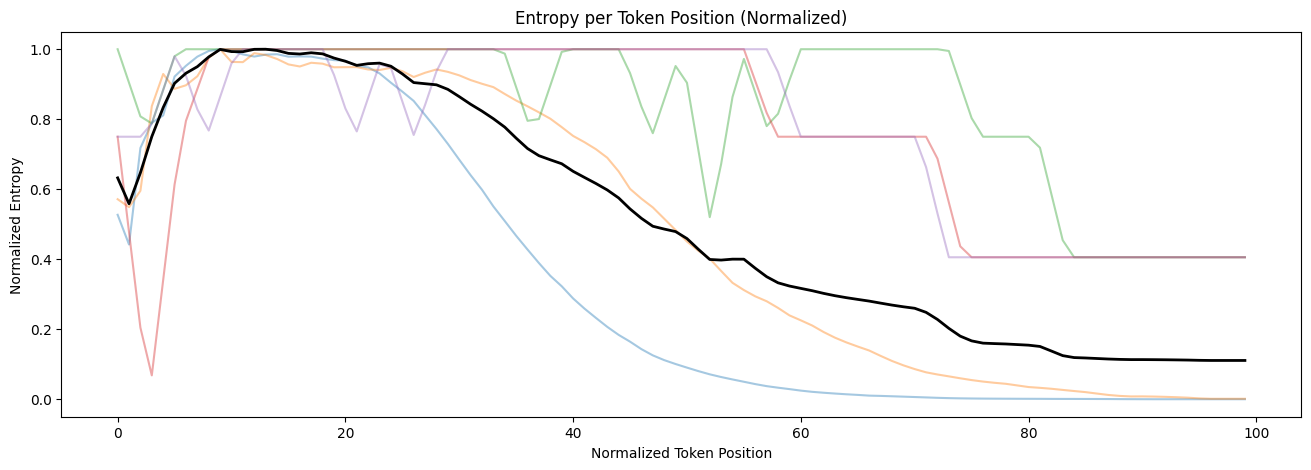


--- Cluster S -1 ---
Sample-1: Define and List Core Properties
Sample-2: List Format with Placeholder Filling
Sample-3: List of Methods with Summary Conclusion
Template: ............

--- Cluster S 519 ---
Sample-1: Define, List, and Exemplify
Sample-2: Define, List, Exemplify, Evaluate
Sample-3: Clarify, Structure, and Exemplify
Template: .........

--- Cluster S 656 ---
Sample-1: Stepwise Procedural Guide
Sample-2: Stepwise Procedural Guide
Sample-3: Stepwise Procedural Guide
Template: .........

--- Cluster S 443 ---
Sample-1: Define and Enumerate Features
Sample-2: Enumerated Feature Listing
Sample-3: Enumerated Feature Listing
Template: enumerated feature...

--- Cluster S 241 ---
Sample-1: Prompt Generation and Reframing
Sample-2: Direct Structured Prompt Generation
Sample-3: Structured Prompt Construction
Template: ............

--- Cluster S 657 ---
Sample-1: Stepwise Instructional Guide
Sample-2: Stepwise Instructional Guide
Sample-3: Stepwise Instructional Guide
Template: st

C:\Users\kachr\AppData\Local\Temp\ipykernel_23284\3109160259.py:23: RuntimeWarning: invalid value encountered in divide
  plt.plot(entropies_interp / entropies_interp.max(), label=f'Cluster {k} {cluster_id}', alpha=0.4)



--- Cluster S 246 ---
Sample-1: Comprehensive Sequential Paraphrase
Sample-2: Direct Paraphrase Generation
Sample-3: Structural Paraphrase
Template: ... paraphrase

--- Cluster S 489 ---
Sample-1: Comprehensive Sequential Explanation
Sample-2: Sequential Explanation with Worked Example
Sample-3: Sequential Explanation with General Conclusion
Template: ...... explanation...

--- Cluster S 446 ---
Sample-1: Sequential Thematic Explanation
Sample-2: Sequential Thematic Explanation
Sample-3: Sequential Thematic Elaboration
Template: sequential thematic...

--- Cluster S 269 ---
Sample-1: Historical Framing and Comparative Analysis
Sample-2: Historical Framing and Scholarly Debate
Sample-3: Historical Framing and Comparative Analysis
Template: historical framing......

--- Cluster S 213 ---
Sample-1: Structured Table with Contextual Notes
Sample-2: Table Summary with Brief Justification
Sample-3: Table with Detailed Justification
Template: table table with...

--- Cluster S 665 ---
Sample-

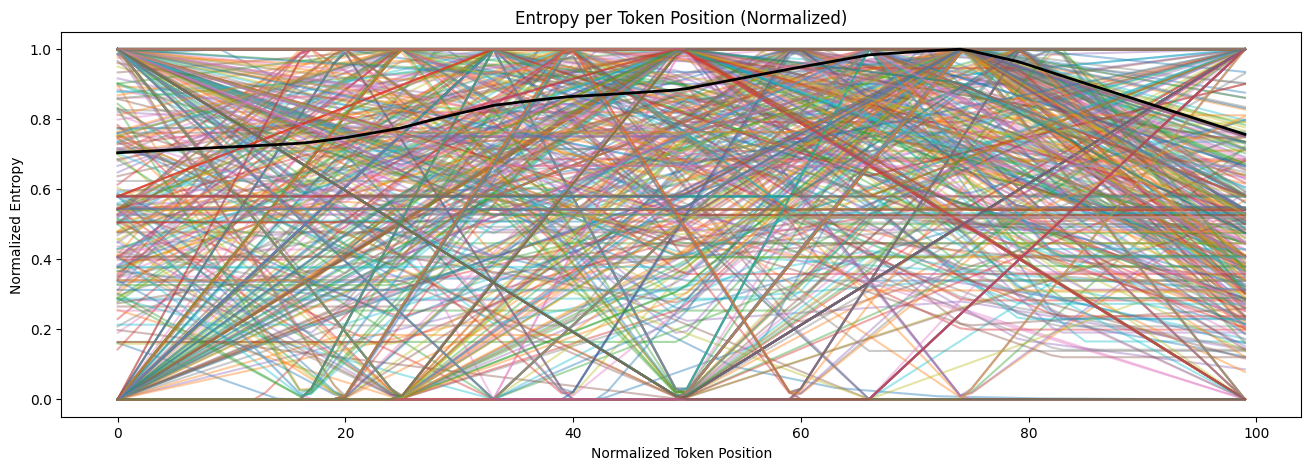

In [26]:
from collections import defaultdict
import matplotlib.pyplot as plt

cluster_dict = {} # [M/T/S][cluster_id][sample_txt]
for k, lab in labels.items():
    
    cluster_dict[k] = defaultdict(list)
    for i, label in enumerate(lab):
            cluster_dict[k][label].append(list(prompts[k])[i])

    # Print samples
    plt.figure(figsize=(16,5))
    NORM_LENGTH = 100
    mean = np.zeros(NORM_LENGTH)  # Initialize mean for entropies
    for cluster_id, samples in cluster_dict[k].items():
        template, entropies = entropy_based_template_generator(samples, 0.8)
        entropies = np.array(entropies)
        # Normalize to fixed length
        x_original = np.linspace(0, 1, len(entropies))
        x_target = np.linspace(0, 1, NORM_LENGTH)
        entropies_interp = np.interp(x_target, x_original, entropies)

        plt.plot(entropies_interp / entropies_interp.max(), label=f'Cluster {k} {cluster_id}', alpha=0.4)
        mean += entropies_interp

        print(f"\n--- Cluster {k} {cluster_id} ---")
        print(f"Sample-1: {samples[0]}")
        print(f"Sample-2: {samples[1]}")
        print(f"Sample-3: {samples[2]}")
        print(f"Template: {template}")

    mean /= len(cluster_dict[k])
    plt.plot(mean / mean.max(), label='Mean', color='black', linewidth=2)
    plt.xlabel('Normalized Token Position')
    plt.ylabel('Normalized Entropy')
    plt.title('Entropy per Token Position (Normalized)')
    plt.show()



In [27]:
cluster_dict

{'M': defaultdict(list,
             {-1: ["Begins by interpreting the user's request, providing a general definition of 'signal' and establishing the context for further explanation.",
               "Signals intent to fulfill the user's request and frames the response as a list, indicating understanding of the instruction.",
               "Begins by interpreting the user's request, defining data mining, and setting a context for the explanation.",
               "Restates the user's goal and frames the response as a set of methodologies to address the problem, indicating an intent to provide actionable solutions.",
               'Acknowledges the request and frames the response as a list of five writing prompts, directly referencing the novel and story.',
               'Affirms knowledge and frames the response by situating the framework within the broader context of storytelling archetypes and its historical use.',
               "Restates the user's request and frames the respon

In [28]:
for k in cluster_dict.keys():
    for cluster, sentences in cluster_dict[k].items():
        for sent in sentences:
            if k == 'S':
                key_a = "S_a"
                key_b = "S_b"
            else:
                key_a = f'{k}_a_text'
                key_b = f'{k}_b_text'
            mask_a = (new_df[key_a] == sent)
            mask_b = (new_df[key_b] == sent)
            new_df.loc[mask_a,f'{k}_a_cid'] = cluster
            new_df.loc[mask_b,f'{k}_b_cid'] = cluster

In [29]:
new_df

,query,output_a,M_a_text,T_a_text,A_a_text,M_a_span,T_a_span,A_a_span,S_a,output_b,...,start_T_b,end_T_b,start_A_b,end_A_b,M_a_cid,M_b_cid,T_a_cid,T_b_cid,S_a_cid,S_b_cid
0,Define Signal Discuss its various properties w...,A signal is a form of energy that is used to t...,"Begins by interpreting the user's request, pro...",Transitions into a structured breakdown of sig...,A signal is a form of energy that is used to t...,"[0, 27]","[28, 102]","[0, 121]",Define and List Core Properties,A signal is a message that is conveyed from a ...,...,0.118902,0.548780,0.000000,0.625000,-1.0,-1.0,2.0,2.0,-1.0,-1.0
1,Please make a list of independent Fertility co...,"Sure, here are some independent Fertility coac...",Signals intent to fulfill the user's request a...,Implements the plan by presenting a numbered l...,1. Fertility Authority\n2. Fertility Solutions...,"[0, 18]","[19, 70]","[19, 70]",List Format with Placeholder Filling,"Sure, here is a list of independent Fertility ...",...,0.139073,0.655629,0.139073,0.655629,-1.0,159.0,2.0,2.0,-1.0,-1.0
2,Explain various data mining functionalities wi...,Data mining is a process of discovering patter...,"Begins by interpreting the user's request, def...","Transitions into a structured list, systematic...",These are just a few examples of the many diff...,"[0, 27]","[28, 169]","[170, 239]","Define, List, and Exemplify",Data mining is the process of discovering patt...,...,0.056000,0.560000,0.562667,0.752000,-1.0,-1.0,2.0,2.0,519.0,682.0
3,How do I change the short cut on mac osx to to...,To change the shortcut on Mac OS X to toggle t...,"Sets up a clear instructional intent, restatin...","Implements a detailed, sequential procedure wi...",That's it! Now you can use the key combination...,"[0, 18]","[19, 143]","[144, 159]",Stepwise Procedural Guide,To change the shortcut for toggling VoiceOver ...,...,0.154545,1.090909,1.100000,1.227273,189.0,-1.0,2.0,2.0,655.0,-1.0
4,"I have a project where we deploy the ""Vertex A...",To accurately calculate the roundtrip time for...,Restates the user's goal and frames the respon...,Organizes the answer as a numbered list of dis...,"By using one or more of these methodologies, y...","[0, 19]","[20, 120]","[121, 143]",List of Methods with Summary Conclusion,Here are some methodologies and ideas to accur...,...,0.062295,0.616393,0.619672,0.691803,-1.0,-1.0,2.0,2.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9114,I want to open the developler tools in chrome ...,I'm here to help! It's possible that the websi...,Expresses intent to help and frames the proble...,Suggests a step-by-step approach to confirm th...,If you need to use the developer tools on this...,"[0, 33]","[34, 107]","[108, 146]",Diagnose and Advise with Alternatives,The shortcut for opening the developer tools i...,...,0.152778,0.837963,0.842593,1.074074,-1.0,-1.0,2.0,2.0,121.0,142.0
9115,Market trends in the 13th century in france\n<...,The economic and agricultural growth in 13th c...,Begins by framing the historical context and c...,"Considers possible indirect effects, explores ...","Overall, the 13th century was a time of signif...","[0, 34]","[35, 130]","[131, 80]",Contextualization and Indirect Effects,The impact of the 13th century market trends i...,...,0.128571,0.680952,0.685714,0.352381,-1.0,-1.0,2.0,2.0,-1.0,-1.0
9116,how the HS code reffers to commodity code and ...,"The HS code, commodity code, and commodity fam...",Begins by framing the answer as a summary and ...,Implements the plan by sequentially defining e...,"In summary, HS codes, commodity codes, and com...","[0, 19]","[20, 117]","[118, 74]",Sequential Definitions and Compliance Emphasis,"The HS code, commodity code, and commodity fam...",...,0.192661,0.541284,0.550459,0.633028,-1.0,-1.0,2.0,2.0,-1.0,-1.0
9117,"Historically, when interest rates flatten from...",For each of the housing market declines listed...,Restates the user's comparative causal questio...,"Implements a str

In [30]:
new_df.to_json("clustered_data.jsonl")

In [44]:
A_group = new_df[['M_a_cid','T_a_cid', 'S_a_cid','label']]
B_group = new_df[['M_b_cid','T_b_cid', 'S_b_cid', 'label']]
AB_group = new_df[['M_a_cid','T_a_cid', 'S_a_cid', 'M_b_cid','T_b_cid', 'S_b_cid', 'label']]
AB_group = AB_group.drop_duplicates()
label = new_df['label']

In [45]:
AB_group

,M_a_cid,T_a_cid,S_a_cid,M_b_cid,T_b_cid,S_b_cid,label
0,-1.0,2.0,-1.0,-1.0,2.0,-1.0,1
1,-1.0,2.0,-1.0,159.0,2.0,-1.0,3
2,-1.0,2.0,519.0,-1.0,2.0,682.0,1
3,189.0,2.0,655.0,-1.0,2.0,-1.0,0
5,-1.0,2.0,-1.0,-1.0,2.0,-1.0,0
...,...,...,...,...,...,...,...
9104,-1.0,2.0,-1.0,-1.0,2.0,440.0,0
9109,-1.0,2.0,3.0,-1.0,2.0,-1.0,0
9110,-1.0,2.0,587.0,-1.0,2.0,711.0,-1
9114,-1.0,2.0,121.0,-1.0,2.0,142.0,1


In [ ]:
Preference_graph = {}